In [47]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf

# For time stamps
from datetime import datetime


In [49]:
# Define the tech stocks for analysis
tech_list = ["AAPL", "GOOG", "MSFT", "AMZN"]

# Set up start and end dates
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# Download stock data using yfinance
company_data = {}
for stock in tech_list:
    company_data[stock] = yf.download(stock, start=start, end=end)

# Add company name column
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]
for stock, name in zip(tech_list, company_name):
    company_data[stock]["company_name"] = name

# Concatenate dataframes
df = pd.concat(company_data.values(), axis=0)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 996 entries, 2024-05-06 to 2025-05-02
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (Close, AAPL)     249 non-null    float64
 1   (High, AAPL)      249 non-null    float64
 2   (Low, AAPL)       249 non-null    float64
 3   (Open, AAPL)      249 non-null    float64
 4   (Volume, AAPL)    249 non-null    float64
 5   (company_name, )  996 non-null    object 
 6   (Close, GOOG)     249 non-null    float64
 7   (High, GOOG)      249 non-null    float64
 8   (Low, GOOG)       249 non-null    float64
 9   (Open, GOOG)      249 non-null    float64
 10  (Volume, GOOG)    249 non-null    float64
 11  (Close, MSFT)     249 non-null    float64
 12  (High, MSFT)      249 non-null    float64
 13  (Low, MSFT)       249 non-null    float64
 14  (Open, MSFT)      249 non-null    float64
 15  (Volume, MSFT)    249 non-null    float64
 16  (Close, AMZN)     249 non

In [53]:
AAPL.describe()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,249.000000,249.000000,249.000000,249.000000,2.490000e+02
mean,222.153033,224.384829,219.490675,221.740545,5.623883e+07
std,17.330455,17.019174,17.582429,17.513522,3.253561e+07
min,172.419998,182.209646,169.210007,171.949997,2.323470e+07
25%,213.490005,216.023956,210.891213,213.213410,3.962030e+07
50%,224.752884,226.401075,222.530245,224.493183,4.801330e+07
75%,232.887436,234.623621,229.487690,232.807625,6.040290e+07
max,258.735504,259.814335,257.347047,257.906429,3.186799e+08


In [55]:
# General info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 249 entries, 2024-05-06 to 2025-05-02
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (Close, AAPL)     249 non-null    float64
 1   (High, AAPL)      249 non-null    float64
 2   (Low, AAPL)       249 non-null    float64
 3   (Open, AAPL)      249 non-null    float64
 4   (Volume, AAPL)    249 non-null    int64  
 5   (company_name, )  249 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 13.6+ KB


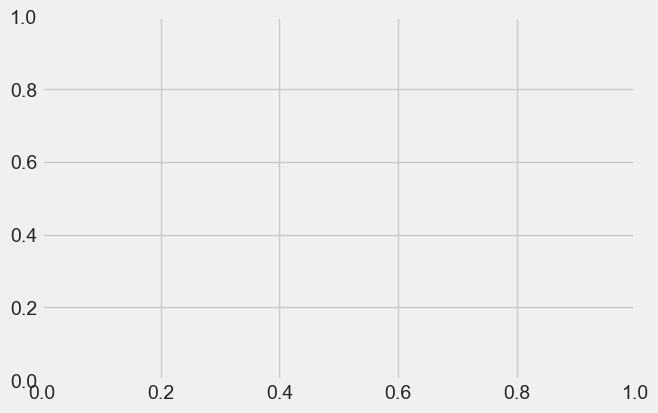

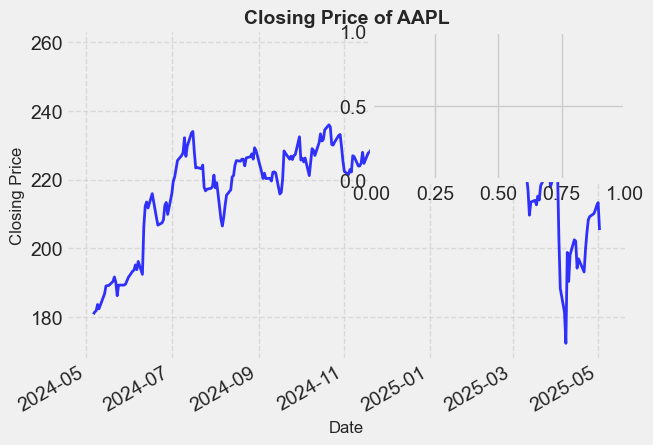

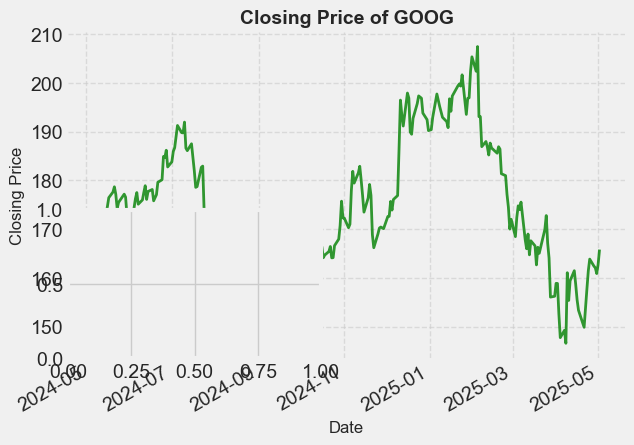

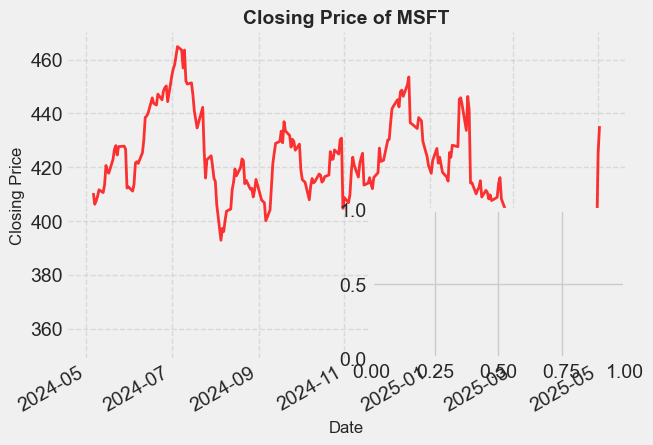

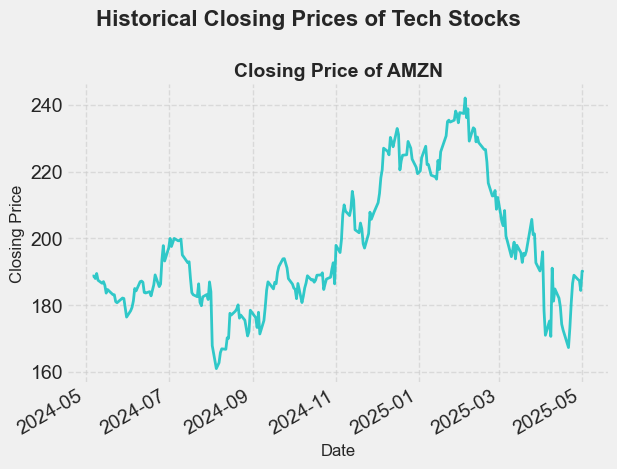

In [81]:
# Let's see a historical view of the closing price
# Set up the figure

plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=0.9, bottom=0.1)

# Define colors for each company
colors = ['b', 'g', 'r', 'c']

# Assuming company_list and tech_list are defined elsewhere. If not, you'll need to define them.
# For example:
# company_list = [pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame()]
# tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

for i, (company, color) in enumerate(zip(company_list, colors), 1):
    plt.subplot(2, 2, i)
    company['Close'].plot(color=color, linewidth=2, alpha=0.8)
    plt.ylabel('Closing Price', fontsize=12)
    plt.xlabel('Date', fontsize=12)
    plt.title(f"Closing Price of {tech_list[i - 1]}", fontsize=14, fontweight='bold')
    plt.grid(True, linestyle='--', alpha=0.6)
    
    # Remove all spines (borders)
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    
    # Remove the legend
    if ax.get_legend() is not None:
        ax.get_legend().remove()

plt.suptitle("Historical Closing Prices of Tech Stocks", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

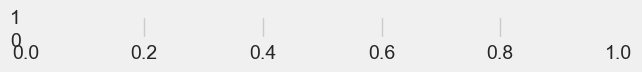

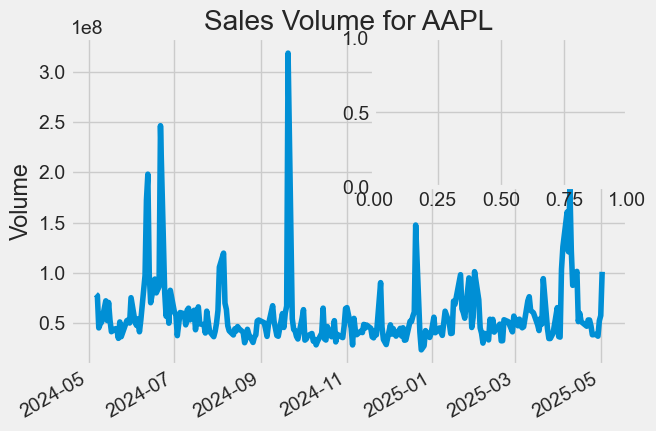

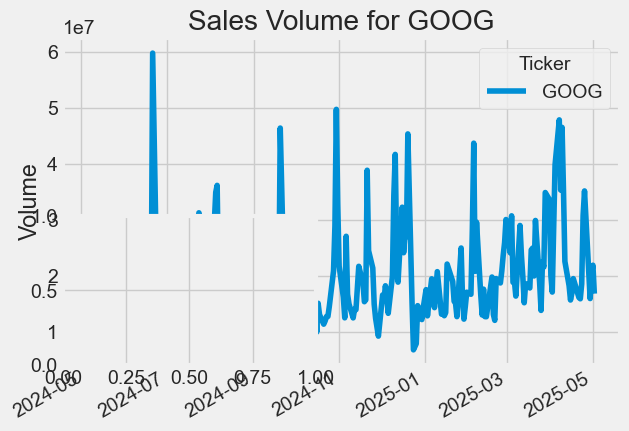

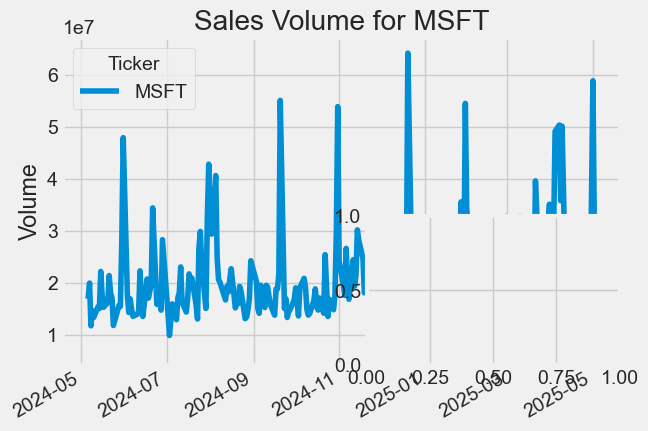

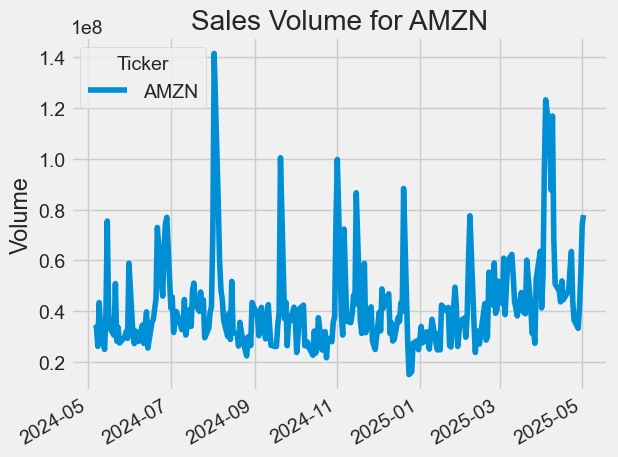

In [71]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

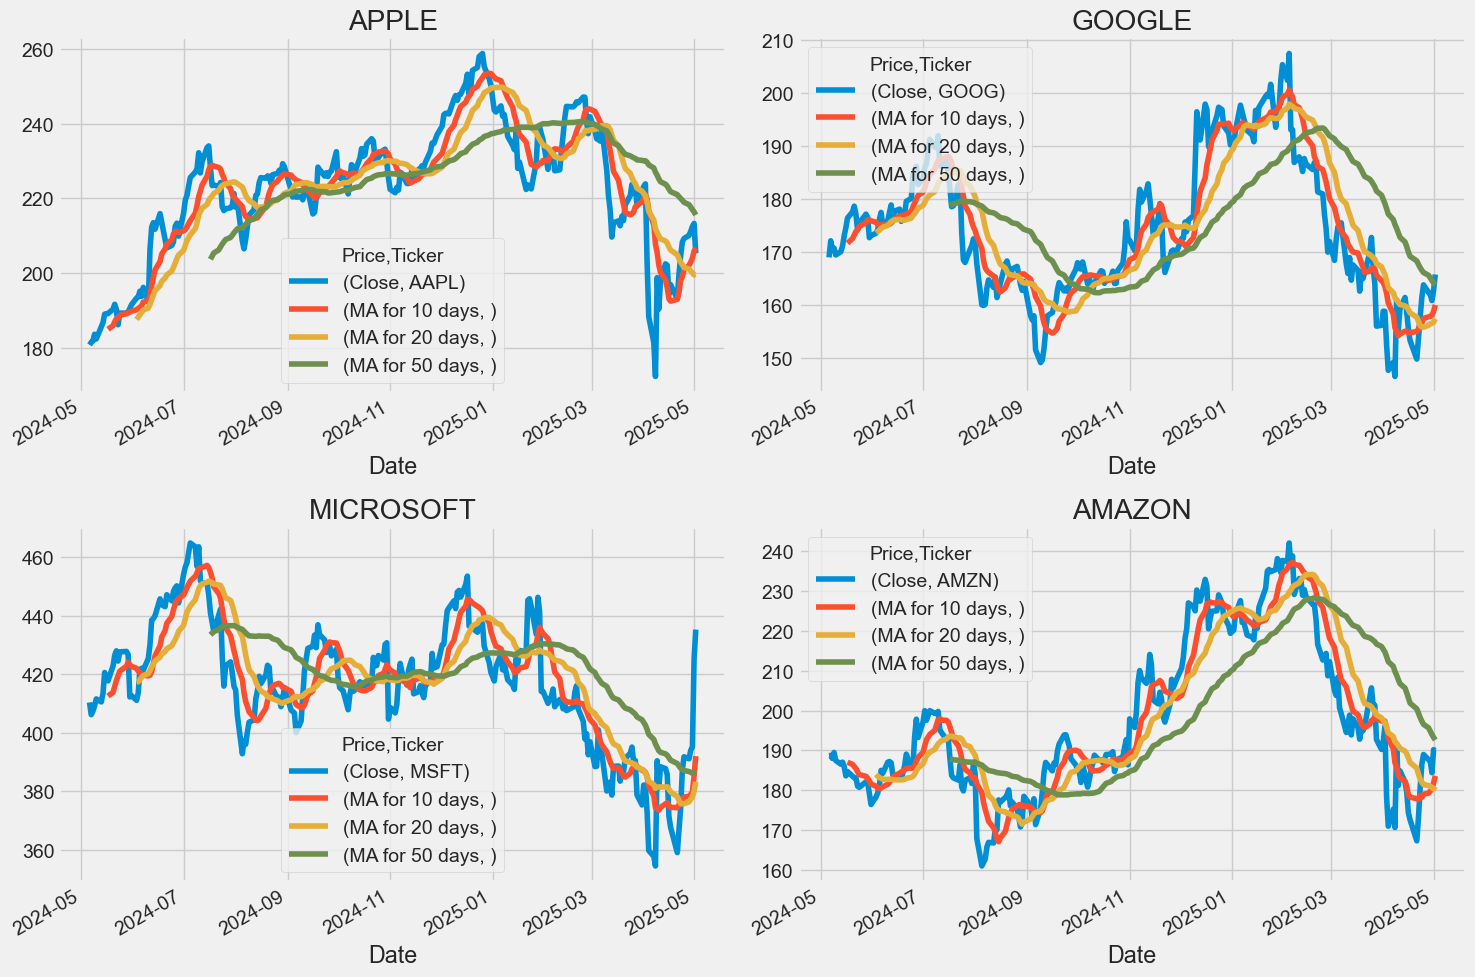

In [83]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()
plt.show()

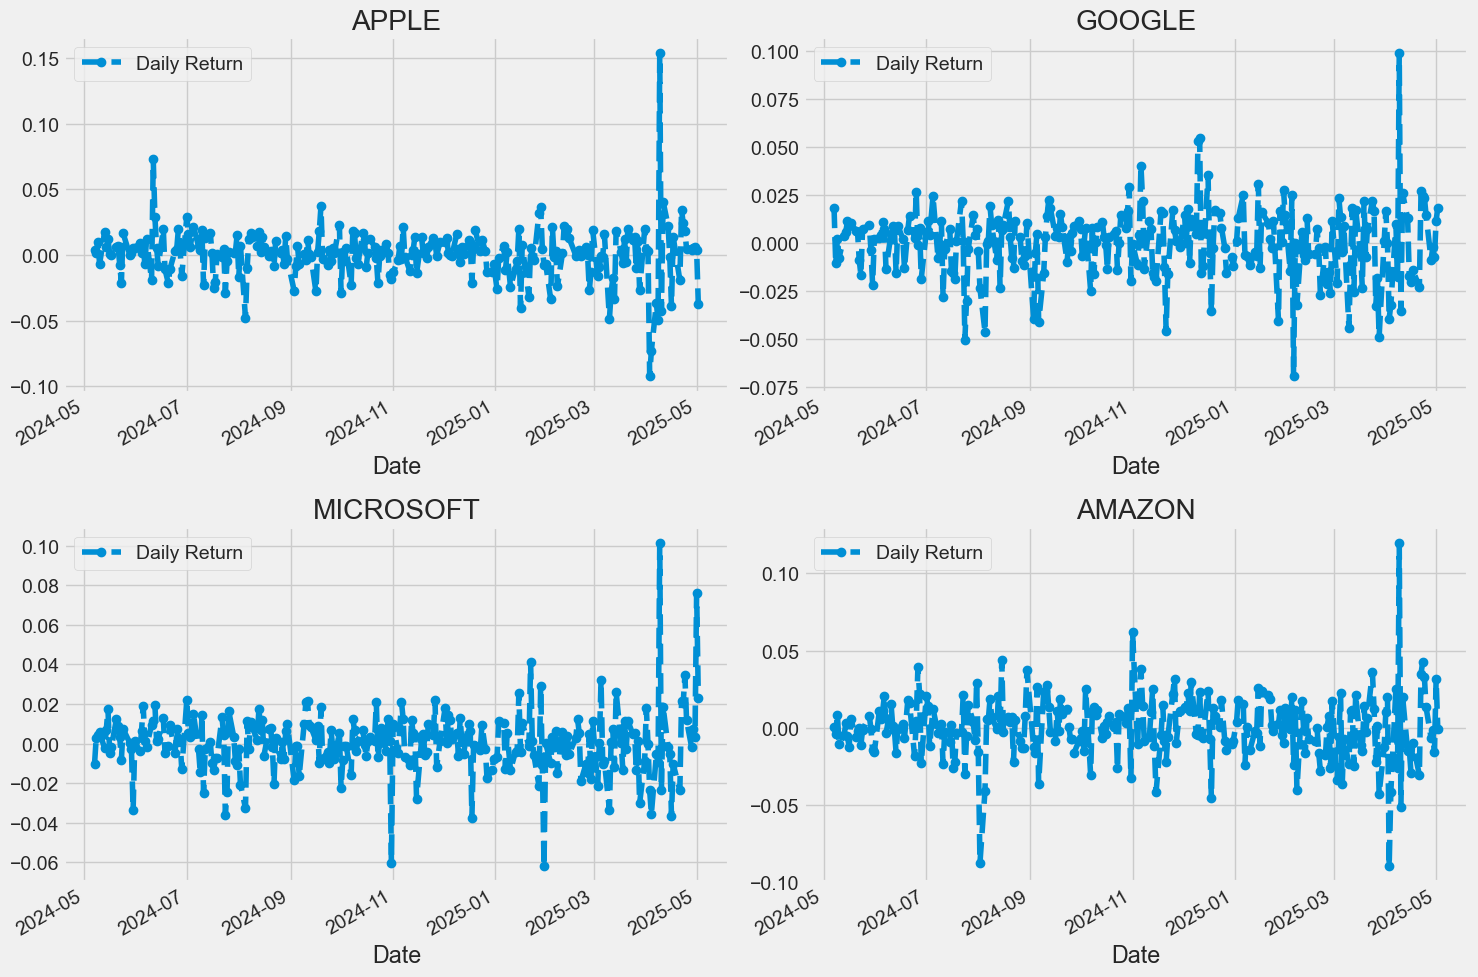

In [87]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()
plt.show()

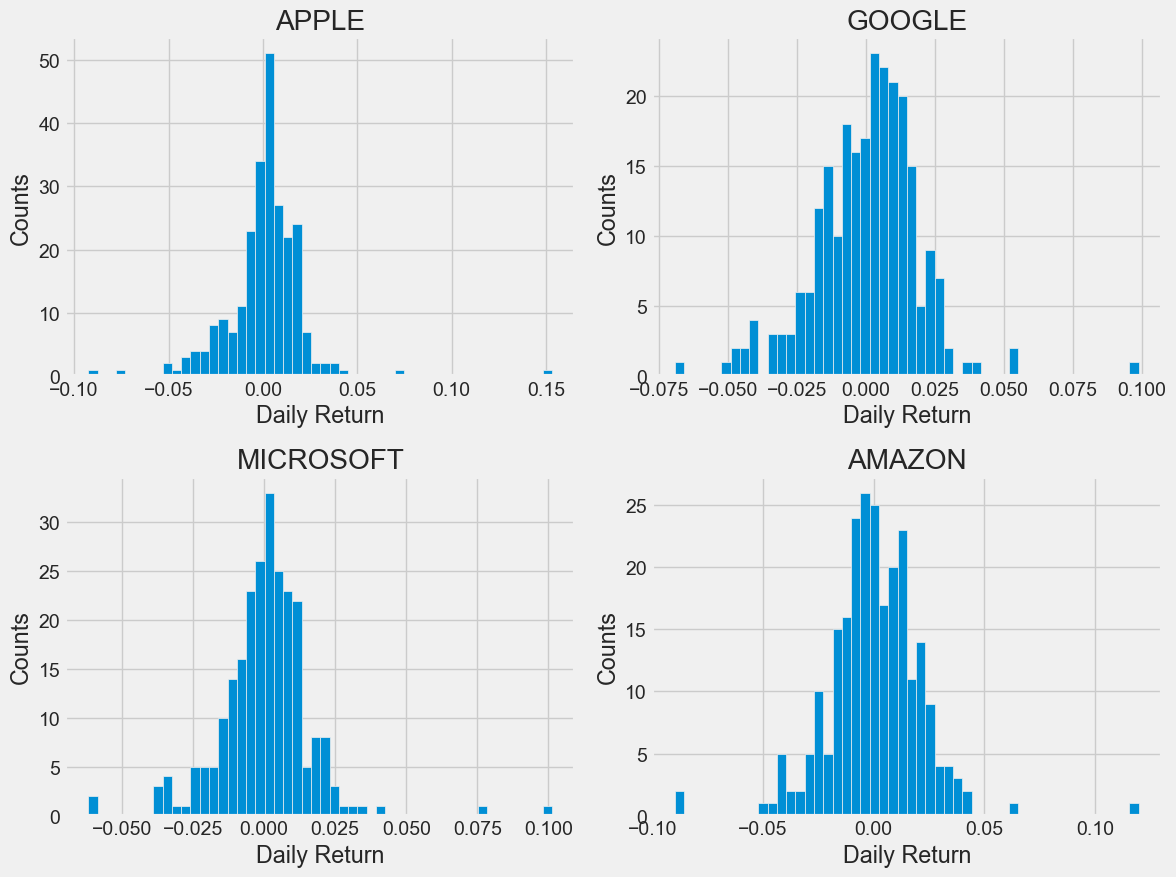

In [89]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

In [95]:
# Grab all the closing prices for the tech stock list into one DataFrame
# Fetch stock data using yfinance
closing_df = yf.download(tech_list, start=start, end=end)['Close']

# Calculate percentage change
tech_rets = closing_df.pct_change()
print(tech_rets.head())

[*********************100%***********************]  4 of 4 completed

Ticker          AAPL      AMZN      GOOG      MSFT
Date                                              
2024-05-06       NaN       NaN       NaN       NaN
2024-05-07  0.003797  0.000318  0.018548 -0.010156
2024-05-08  0.001864 -0.004026 -0.010522  0.002931
2024-05-09  0.010014  0.007979  0.002454  0.004336
2024-05-10 -0.006890 -0.010660 -0.007518  0.005869


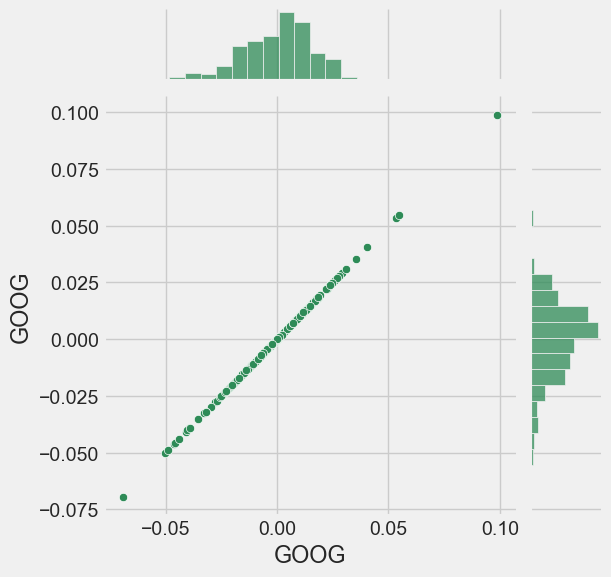

In [97]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

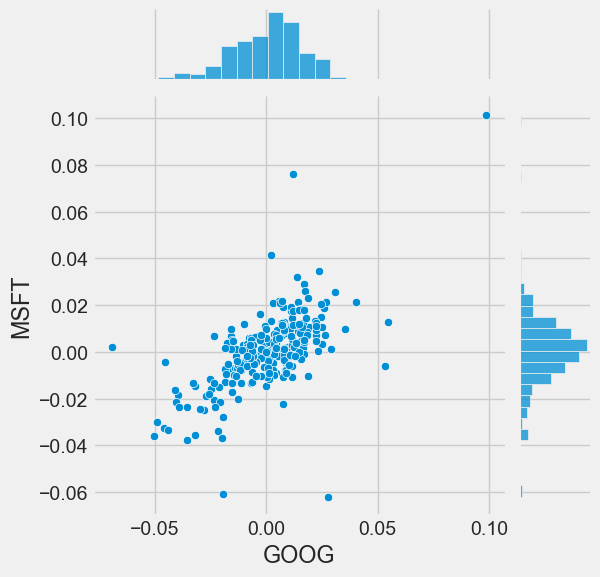

In [99]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

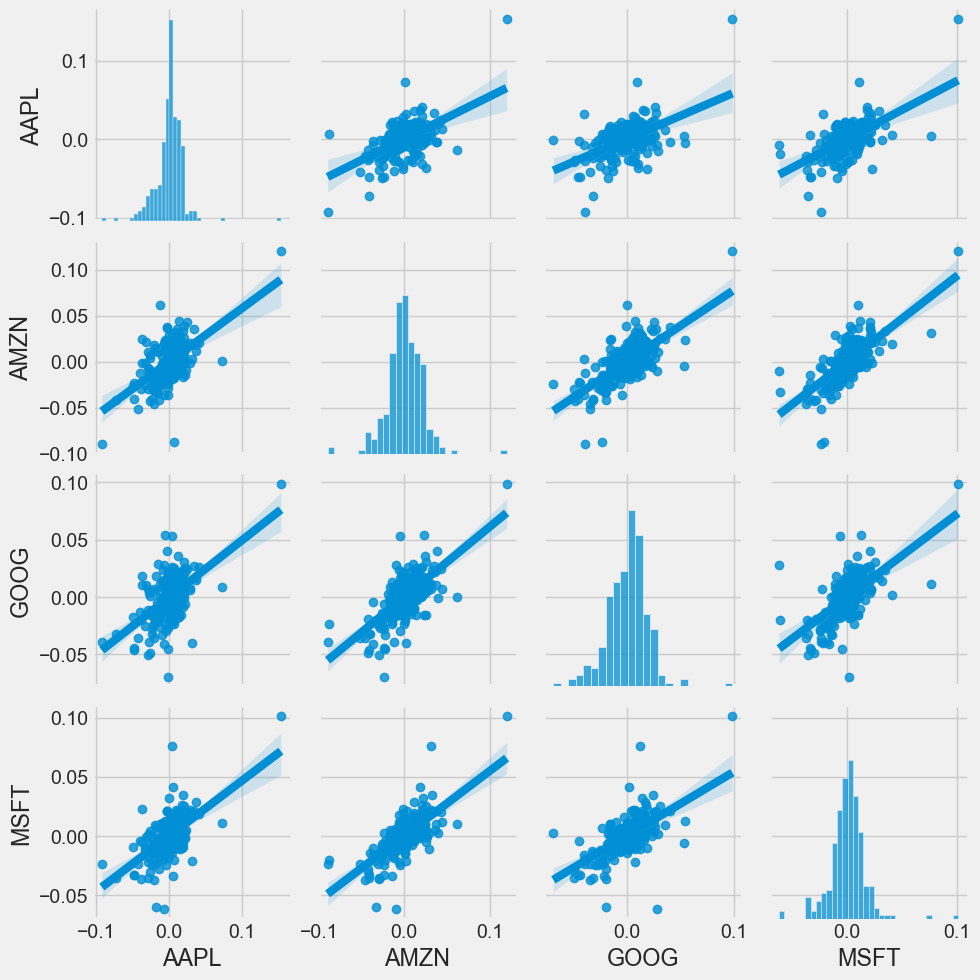

In [101]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

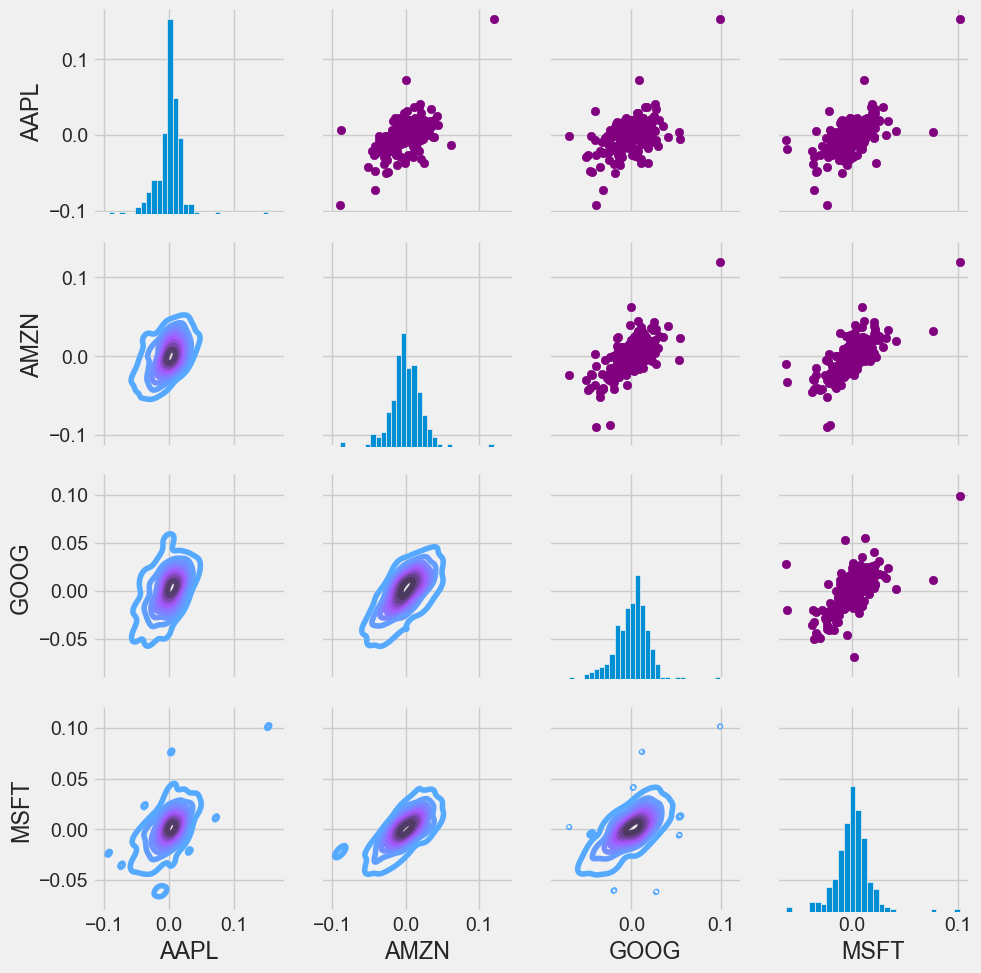

In [103]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

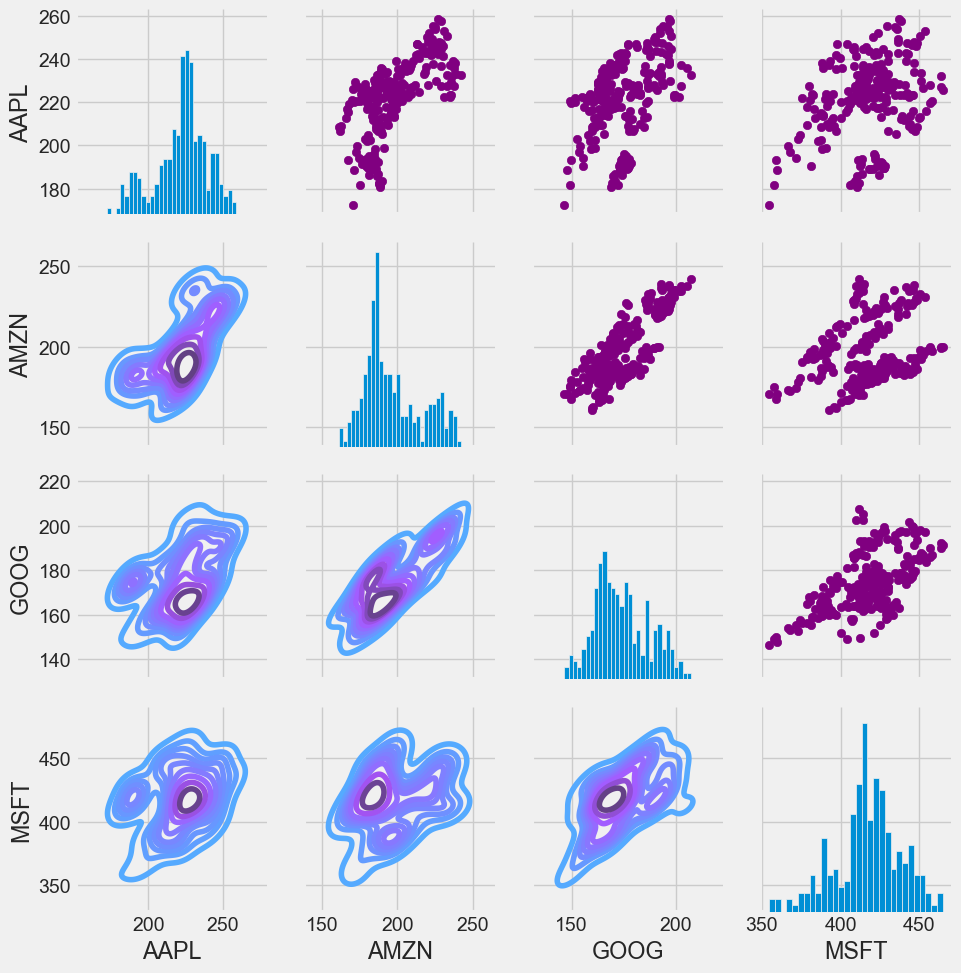

In [105]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Text(0.5, 1.0, 'Correlation of stock closing price')

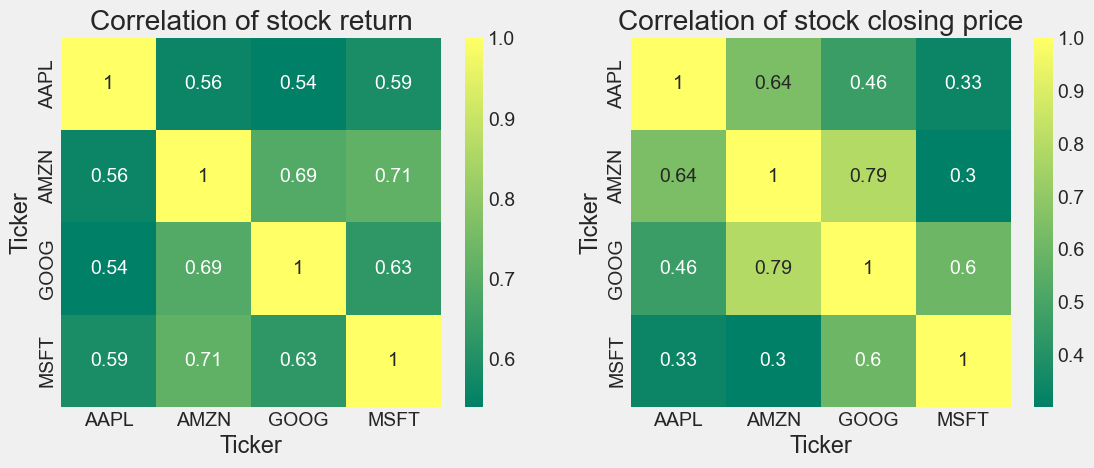

In [107]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

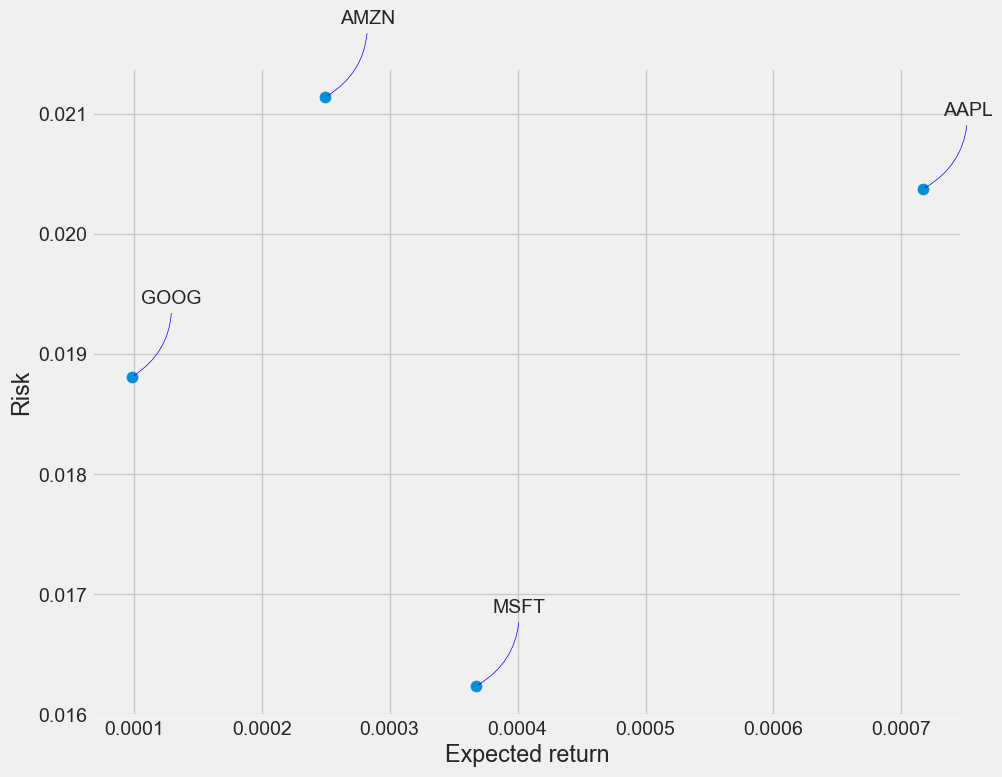

In [109]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

In [115]:
ticker = "AAPL"
start_date = "2012-01-01"
end_date = datetime.now().strftime("%Y-%m-%d")  # Convert datetime to string

# Fetch stock data using yfinance
df = yf.download(ticker, start=start_date, end=end_date)
df

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2012-01-03,12.375392,12.413611,12.308284,12.320321,302220800
2012-01-04,12.441898,12.479215,12.316709,12.338376,260022000
2012-01-05,12.580025,12.595673,12.418723,12.487337,271269600
2012-01-06,12.711535,12.722068,12.615838,12.632389,318292800
2012-01-09,12.691373,12.872536,12.679937,12.804826,394024400
...,...,...,...,...,...
2025-04-28,210.139999,211.500000,207.460007,210.000000,38743100
2025-04-29,211.210007,212.240005,208.369995,208.690002,36827600


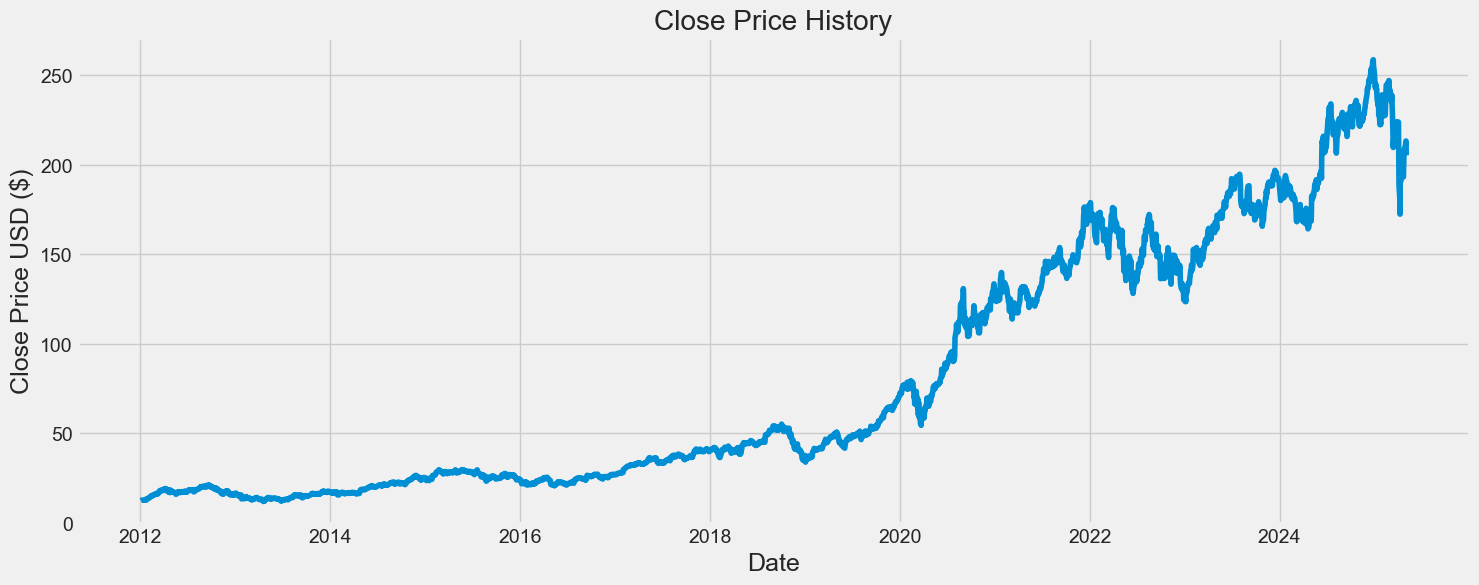

In [117]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [163]:
# Create a new dataframe with only the 'Close column'
data = df['Close'].copy()

# Convert the dataframe to a numpy array
dataset = data.values

# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

3186

In [180]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00182111],
       [0.00209058],
       [0.00265023],
       ...,
       [0.8126673 ],
       [0.81598973],
       [0.78369763]])

In [182]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

[array([0.00182111, 0.00209058, 0.00265023, 0.00318307, 0.00310138,
       0.00328549, 0.00320136, 0.00305992, 0.00286727, 0.00346351,
       0.00400122, 0.0038354 , 0.00292702, 0.00379395, 0.00294043,
       0.00614111, 0.00589357, 0.0062167 , 0.00691537, 0.00733846,
       0.0073031 , 0.00717264, 0.00772862, 0.00825171, 0.00884431,
       0.00980147, 0.0118121 , 0.01184256, 0.01296191, 0.01379832,
       0.01236077, 0.01291435, 0.01290337, 0.01445555, 0.01423485,
       0.01464331, 0.01537734, 0.01578578, 0.01696241, 0.01781961,
       0.01806713, 0.01815369, 0.01668809, 0.01633449, 0.01638692,
       0.01776474, 0.01815247, 0.01898525, 0.02094832, 0.0235674 ,
       0.02307722, 0.02307845, 0.02497204, 0.02556462, 0.02514275,
       0.02475742, 0.02435626, 0.02568895, 0.02660346, 0.0269863 ])]
[0.026040152156462763]

[array([0.00182111, 0.00209058, 0.00265023, 0.00318307, 0.00310138,
       0.00328549, 0.00320136, 0.00305992, 0.00286727, 0.00346351,
       0.00400122, 0.0038354 , 0.0

(3126, 60, 1)

In [169]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3126/3126 ━━━━━━━━━━━━━━━━━━━━ 125s 37ms/step - loss: 0.0023


In [184]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


7.132770031250158

C:\Users\user\AppData\Local\Temp\ipykernel_13764\2708289287.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


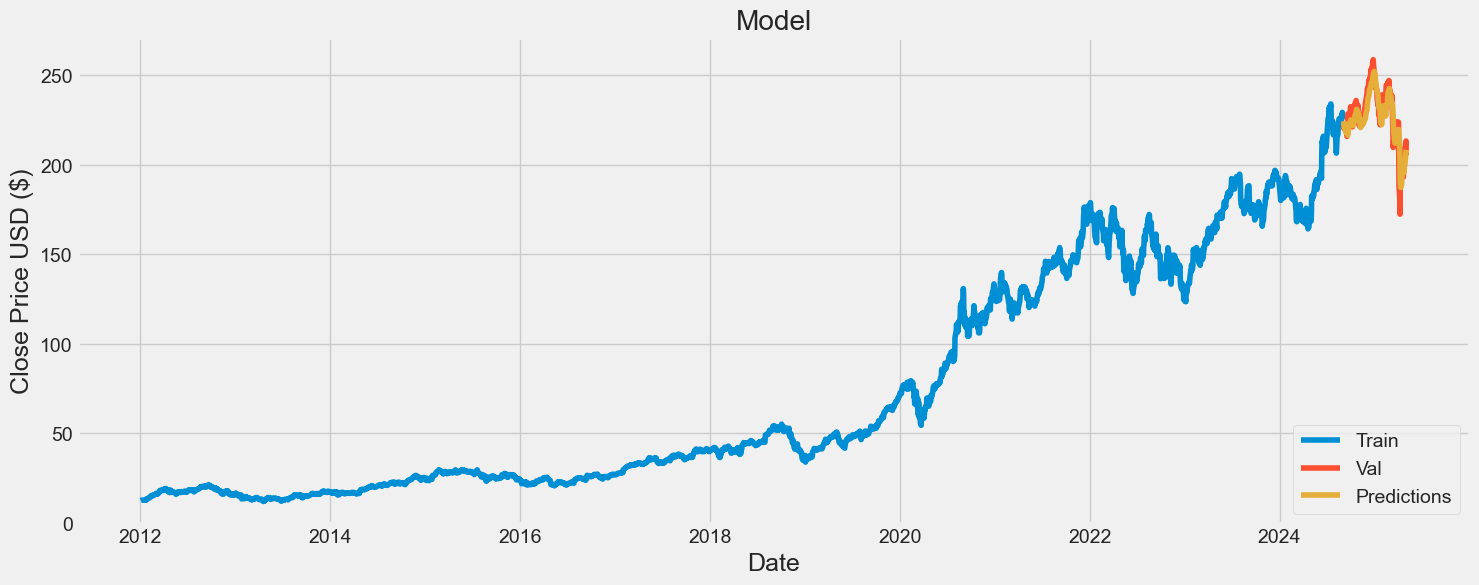

In [186]:
data.columns# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train)
plt.plot(valid)
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()